<a href="https://colab.research.google.com/github/arana3jan/Machine-Learning/blob/master/HackerEarth_Machine_Learning_lose_a_customer_in_10_days__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict the churn risk rate**

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. . Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

*  User demographic information
*  Browsing behavior
*  Historical purchase data among other
   information.

It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## **Task**
Your task is to predict the churn score for a website based on the features provided in the dataset

The columns provided in the dataset are as follows:
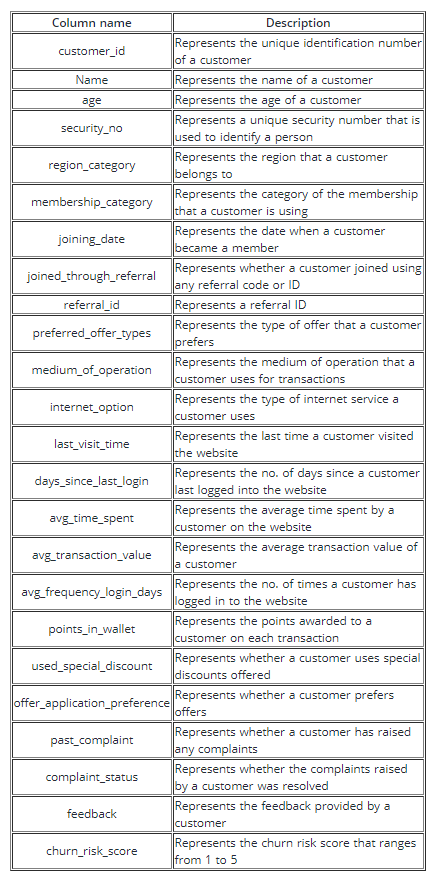


## **Evaluation metric**


score = 100 x metrics.f1_score(actual, predicted, average="macro")

In [ ]:
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

# General
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 4]
plt.style.use("fivethirtyeight")

pd.options.display.max_rows=1000

import warnings
warnings.simplefilter('ignore')

import os
from functools import partial
from scipy.optimize import fmin as scip_fmin
from tqdm import tqdm
import statistics
import tempfile

# Visialisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set(style="whitegrid")
from PIL import Image

# Machine Learning
# Utils
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split, KFold
from sklearn import preprocessing
#import category_encoders as ce
from imblearn.pipeline import Pipeline as imb_pipe
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import impute
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import base
#Feature Selection
from sklearn.feature_selection import chi2, f_classif, f_regression, mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile, VarianceThreshold
from sklearn.decomposition import TruncatedSVD
# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
#Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
# Load Data set

def get_data():
   
    train_set = pd.read_csv('/content/train.csv')
    test_set = pd.read_csv('/content/test.csv')
    sample_set = pd.read_csv('/content/sample_submission.csv')

    return train_set,test_set,sample_set

In [ ]:
train_set,test_set, sample_set = get_data()

train_set = train_set.loc[train_set['churn_risk_score'] >=1]

In [ ]:
train_set.tail(4)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,23:18:31,13,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,12,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,15,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3
36991,fffe43004900440033003600340034003200,Verlene Beaulieu,35,M,LBX0GLR,Town,Silver Membership,2015-10-23,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Mobile_Data,01:39:52,15,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,2


In [ ]:
data =  pd.concat([train_set,test_set],axis=0)
data['source'] = np.nan
data['source'].iloc[:train_set.shape[0]] = "train"
data['source'].iloc[train_set.shape[0]:] = "test"
data.drop(['churn_risk_score'], axis=1, inplace=True)

display(data.shape)

(55748, 25)

In [ ]:
target = 'churn_risk_score'
train_set.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [ ]:
train_set.nunique()

customer_id                     35829
Name                            35829
age                                55
gender                              3
security_no                     35829
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11120
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 29329
days_since_last_login              27
avg_time_spent                  25299
avg_transaction_value           35741
avg_frequency_login_days         1587
points_in_wallet                23161
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    5
dtype: int64

### **Target**

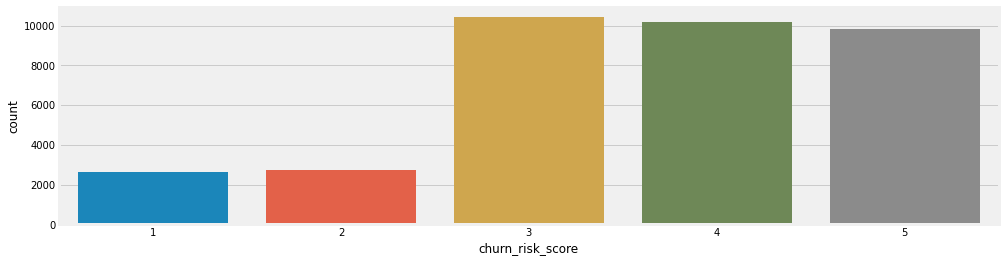

In [ ]:
col = 'churn_risk_score'
plt.rcParams['figure.figsize'] = [15, 4]
sns.countplot(train_set[col])

### **gender**

In [ ]:
col = 'gender'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 3
Test Unique :  3
Test - Train : 0 -- [set()]


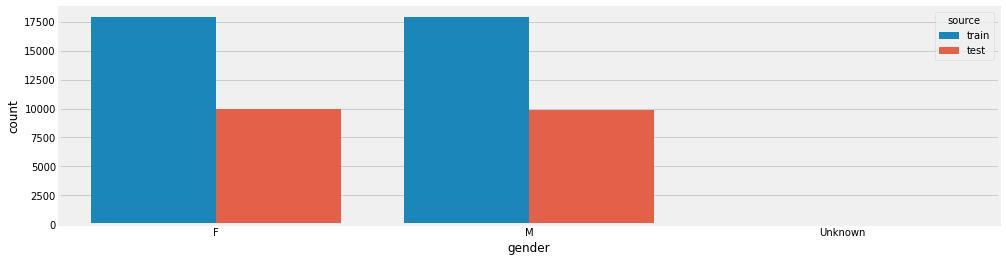

In [ ]:
sns.countplot(data[col],hue = data['source'])

In [ ]:
pd.crosstab(data['gender'],data['source'],margins=True)

source,test,train,All
gender,,,
F,9972,17892,27864
M,9911,17881,27792
Unknown,36,56,92
All,19919,35829,55748


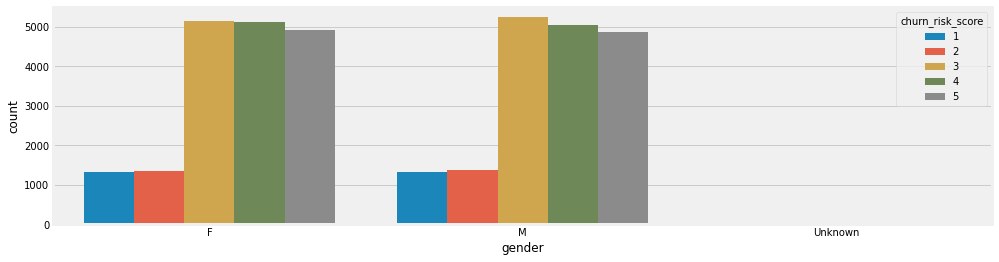

In [ ]:
sns.countplot(train_set[col], hue=train_set[target])

**Gender Analysis**

*   Gender does not affect churn_risk_score as both dist looks same




### **feedback**

In [ ]:
col = 'feedback'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 9
Test Unique :  9
Test - Train : 0 -- [set()]


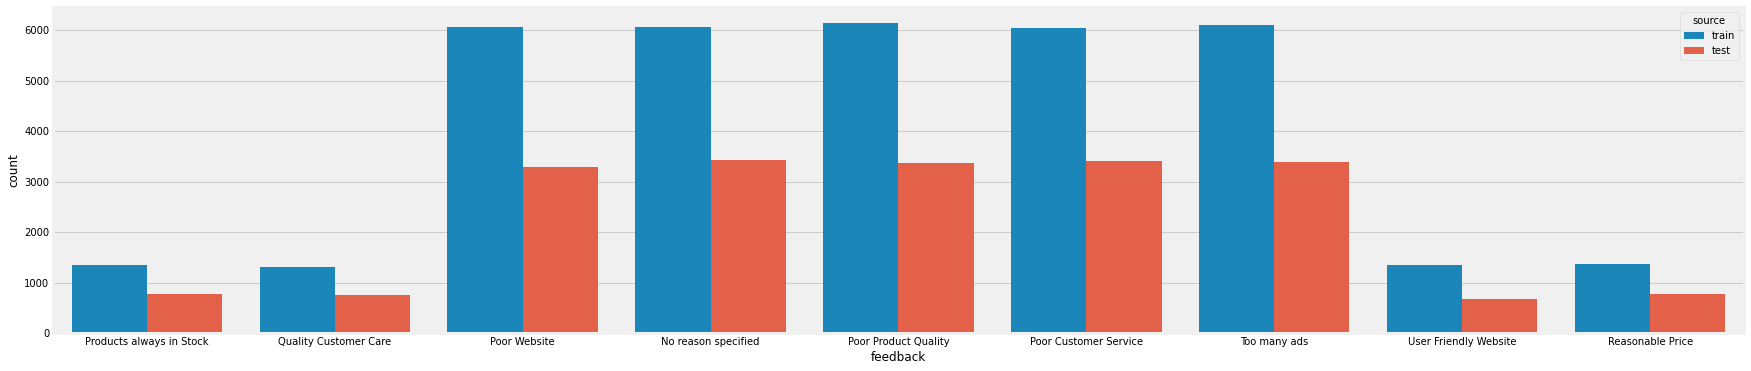

In [ ]:
plt.figure(figsize=(27,6))
sns.countplot(data[col],hue = data['source'])

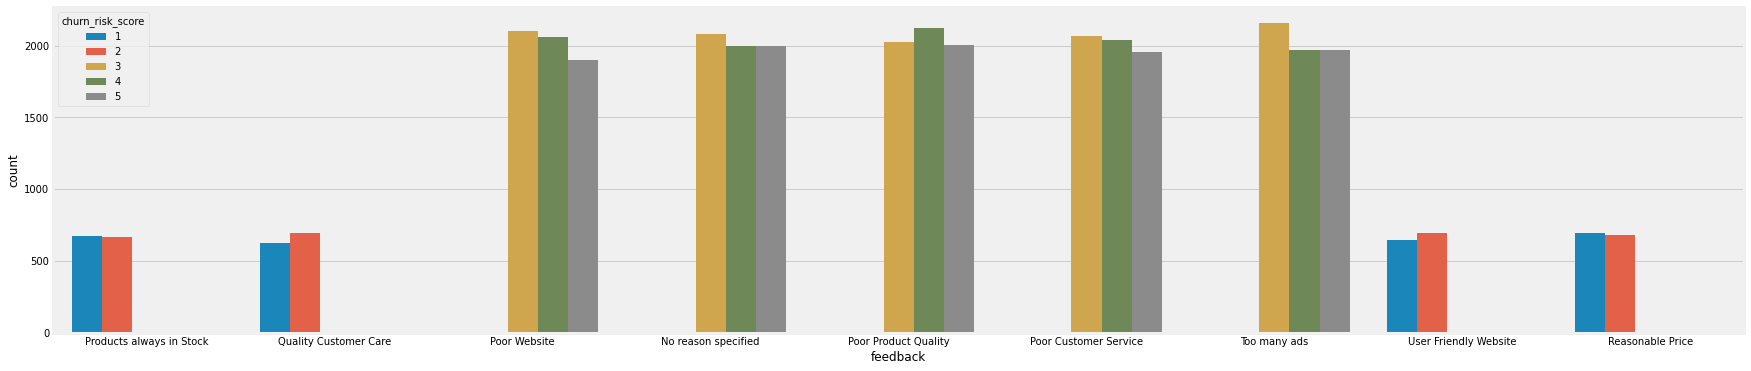

In [ ]:
plt.figure(figsize=(27,6))

sns.countplot(train_set[col], hue=train_set[target])

**feedback analysis**

1.   When feeback is poor website, no reason specified,poor product quality feedback, poor customer service, too many ads chrun risk score is >=3
2.   For others its less 1,2 



### **complaint_status**

In [ ]:
col ='complaint_status'


print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 5
Test Unique :  5
Test - Train : 0 -- [set()]


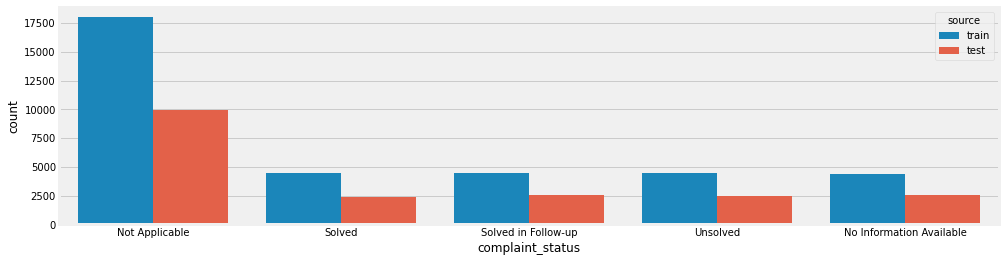

In [ ]:
sns.countplot(data[col], hue = data['source'])

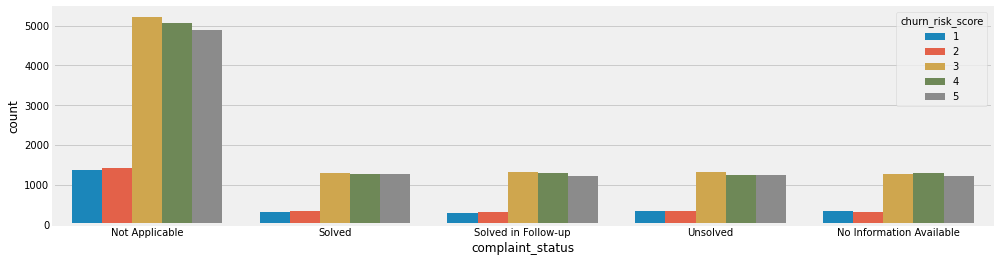

In [ ]:
sns.countplot(train_set[col], hue = train_set[target])

**complaint_status analysis**

1.   More data with not applicable for 3,4 and 5 target




### **past_complaint**

In [ ]:
col = 'past_complaint'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 2
Test Unique :  2
Test - Train : 0 -- [set()]


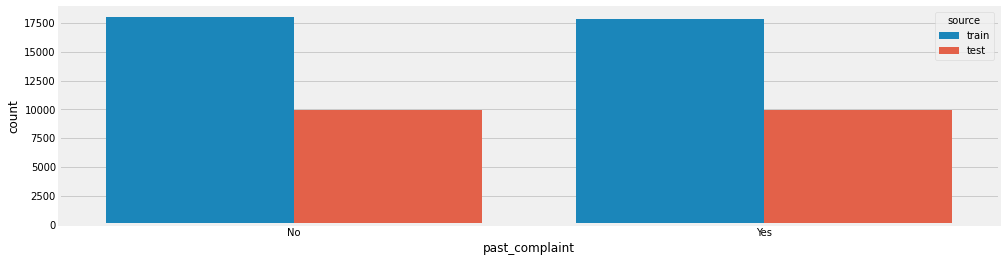

In [ ]:
sns.countplot(data[col],hue=data['source'])

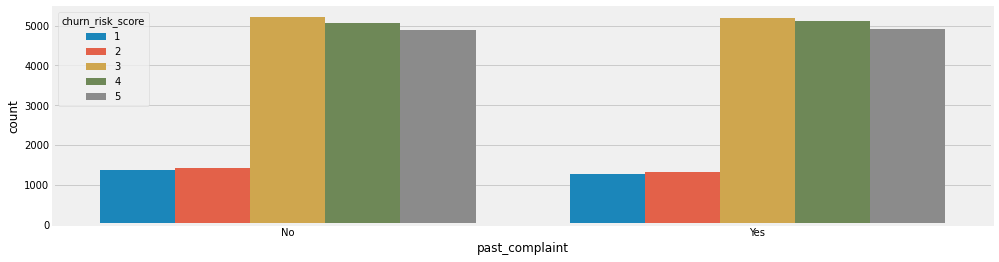

In [ ]:
sns.countplot(train_set[col], hue =train_set[target])

**past_complaint analysis**

1.   past_complaint does not impact the churn_risk_score
  



### **offer_application_preference**

In [ ]:
col = 'offer_application_preference'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 2
Test Unique :  2
Test - Train : 0 -- [set()]


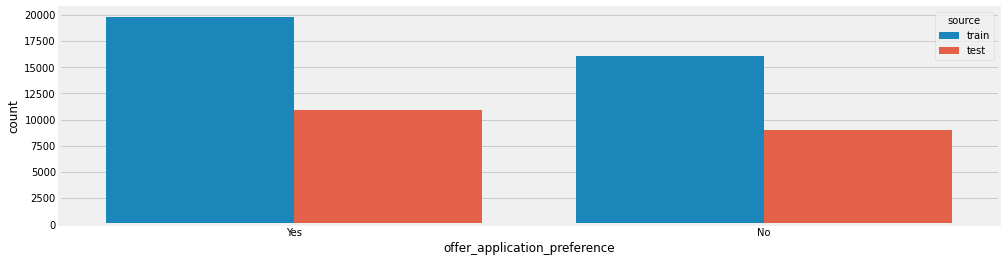

In [ ]:
sns.countplot(data[col],hue = data['source'])

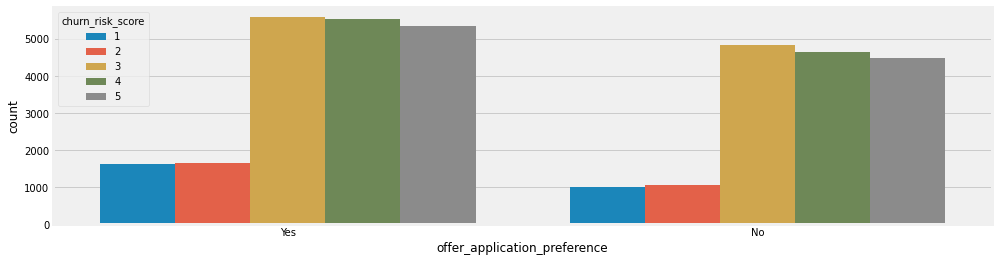

In [ ]:
sns.countplot(train_set[col], hue = train_set[target])

**offer_application_preference**


1.   offer_application_preference does not impact the churn_risk_score

2.   offer_application_preference for yes are greater than No 




### **used_special_discount**

In [ ]:
col ='used_special_discount'


print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 2
Test Unique :  2
Test - Train : 0 -- [set()]


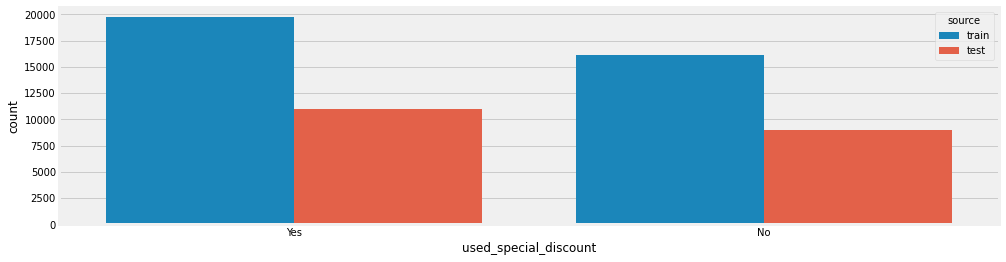

In [ ]:
sns.countplot(data[col], hue = data['source'])

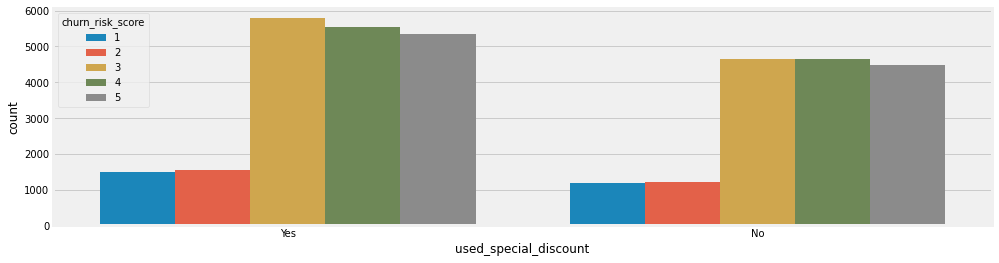

In [ ]:
sns.countplot(train_set[col], hue = train_set[target])


**used_special_discount analysis**

1.  No impact on target
2. looks similar to offer_application_preference




### **internet_option**

In [ ]:
col ='internet_option'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 3
Test Unique :  3
Test - Train : 0 -- [set()]


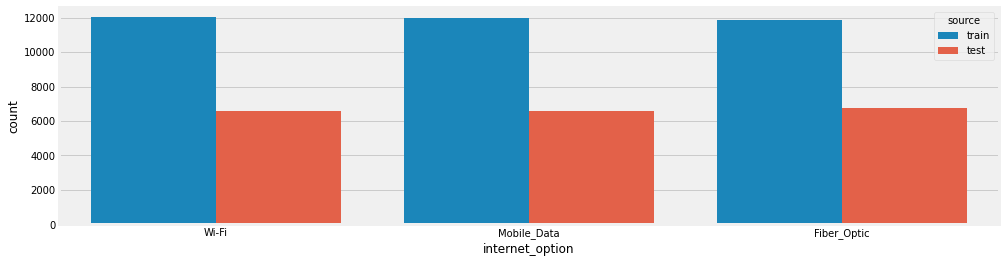

In [ ]:
sns.countplot(data[col], hue = data['source'])

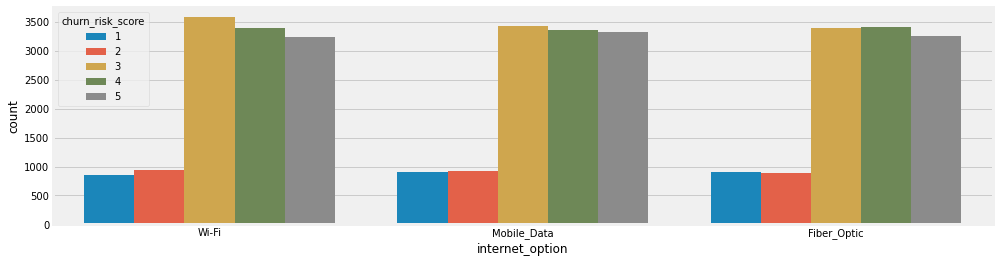

In [ ]:
sns.countplot(train_set[col], hue = train_set[target])

**internet_option analysis**

1.   No impact on target




### **medium_of_operation**

In [ ]:
col ='medium_of_operation'


print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))


Train Unique : 4
Test Unique :  4
Test - Train : 0 -- [set()]


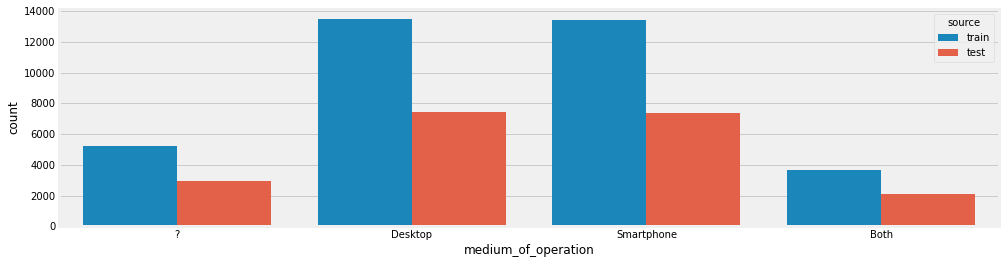

In [ ]:
sns.countplot(data[col], hue = data['source'])

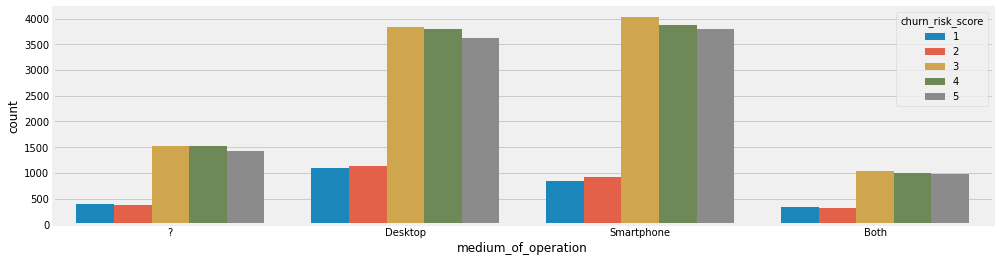

In [ ]:
sns.countplot(train_set[col], hue = train_set[target])

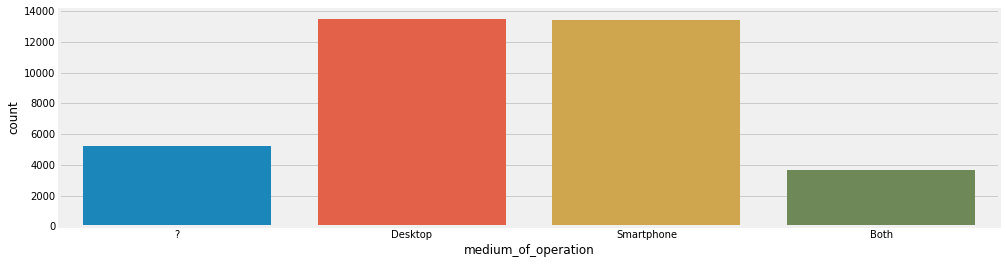

In [ ]:
sns.countplot(train_set[col])

**medium_of_operation analysis**

1.   ? need to replace with missing
2.   No impact on target



### **membership_category**

In [ ]:
col ='membership_category'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 6
Test Unique :  6
Test - Train : 0 -- [set()]


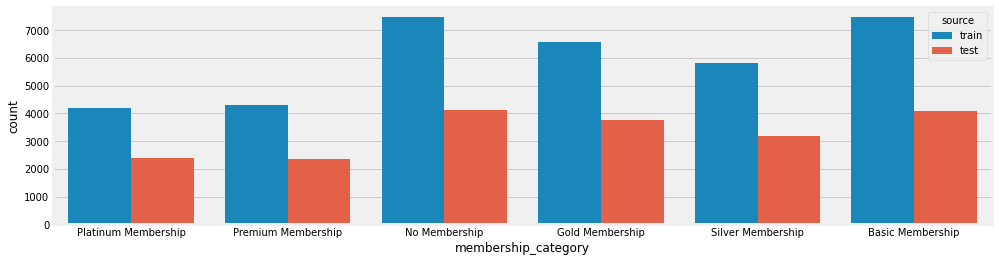

In [ ]:
sns.countplot(data[col], hue = data['source'])

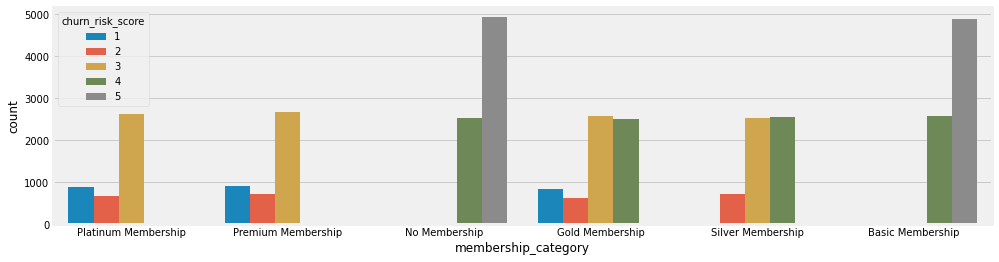

In [ ]:
sns.countplot(train_set[col], hue = train_set[target])

**membership_category analysis**

1.   No membership and basic membership has >=4 risk score
  



### **region_category**

In [ ]:
col = 'region_category'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))


Train Unique : 3
Test Unique :  3
Test - Train : 0 -- [set()]


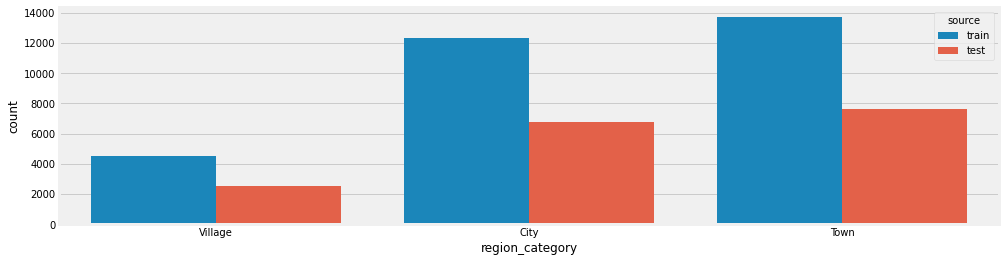

In [ ]:
sns.countplot(data[col], hue = data['source'])

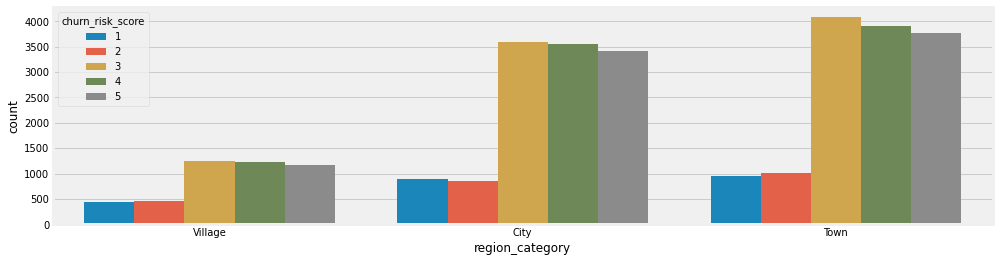

In [ ]:
sns.countplot(train_set[col], hue = train_set[target])

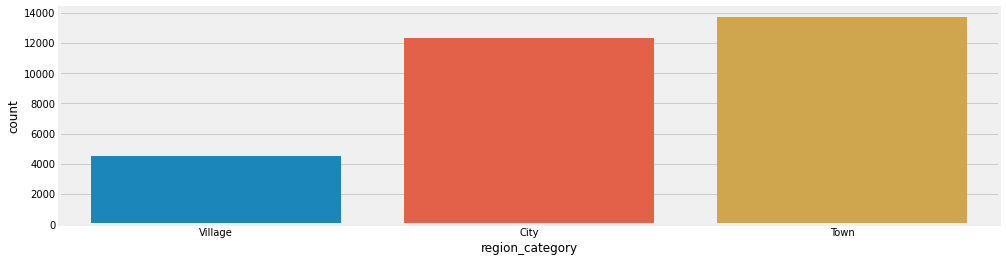

In [ ]:
sns.countplot(train_set[col])

**region_category analysis**

1.   No impact on target
2.   town and city people are more subscriber



### **age**

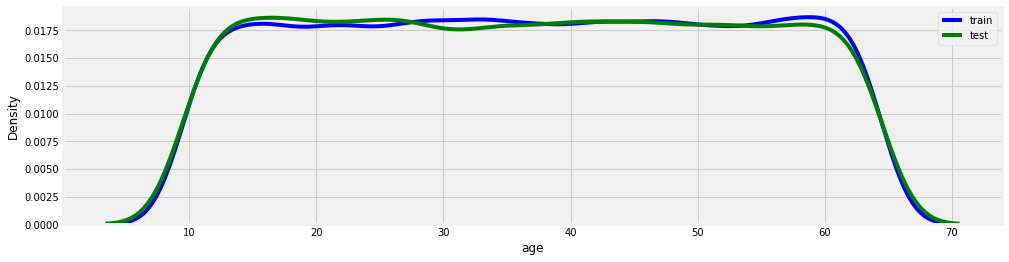

In [ ]:
col = 'age'

plt.figure()
sns.distplot(train_set[col], color='b', label='train', hist=False)
sns.distplot(test_set[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()


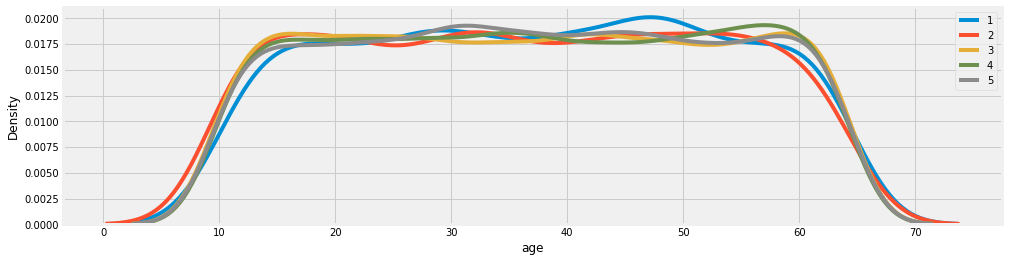

In [ ]:
plt.figure()
sns.distplot(train_set[col][train_set[target] == 1],  label='1',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 2],  label='2',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 3],  label='3',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 4],  label='4',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 5],  label='5',hist=False) # , hist=False

plt.legend(loc='best')
plt.show()

**age analysis**

1.   age not affecting risk score




### **points_in_wallet**

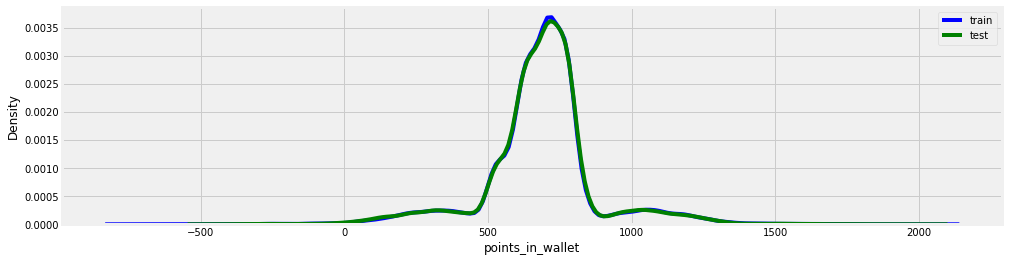

In [ ]:
col='points_in_wallet'

plt.figure()
sns.distplot(train_set[col], color='b', label='train', hist=False)
sns.distplot(test_set[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()


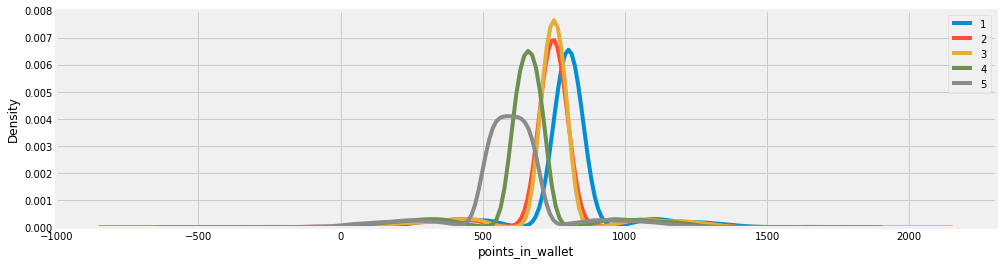

In [ ]:
plt.figure()
sns.distplot(train_set[col][train_set[target] == 1],  label='1',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 2],  label='2',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 3],  label='3',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 4],  label='4',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 5],  label='5',hist=False) # , hist=False

plt.legend(loc='best')
plt.show()

**points_in_wallet analysis**

1.   People with higher risk have less score




### **avg_transaction_value**

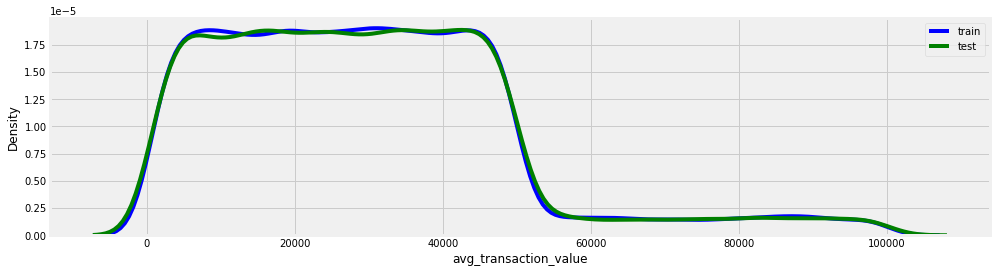

In [ ]:
col ='avg_transaction_value'

plt.figure()
sns.distplot(train_set[col], color='b', label='train', hist=False)
sns.distplot(test_set[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

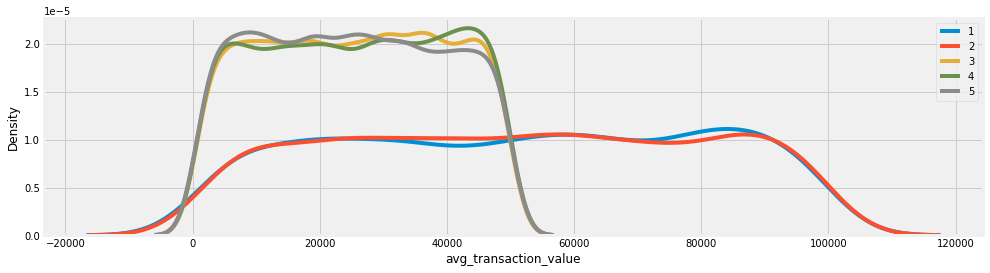

In [ ]:
plt.figure()
sns.distplot(train_set[col][train_set[target] == 1],  label='1',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 2],  label='2',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 3],  label='3',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 4],  label='4',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 5],  label='5',hist=False) # , hist=False

plt.legend(loc='best')
plt.show()

**avg_transaction_value analysis**

1.   Looks not useful at all




### **avg_time_spent**

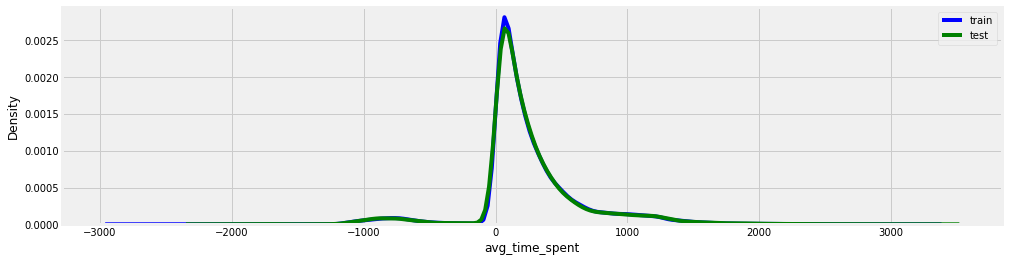

In [ ]:
col = 'avg_time_spent'

plt.figure()
sns.distplot(train_set[col], color='b', label='train', hist=False)
sns.distplot(test_set[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

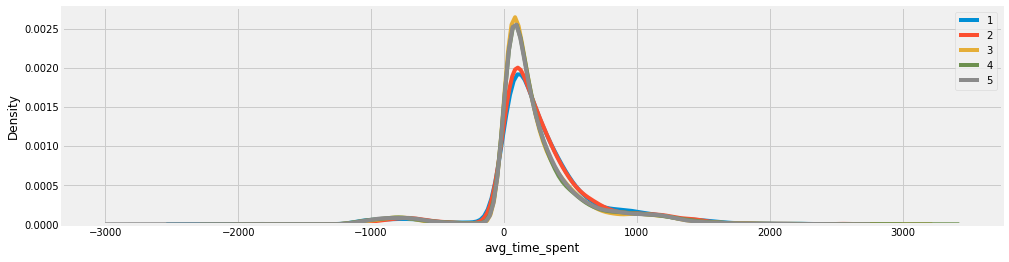

In [ ]:
plt.figure()
sns.distplot(train_set[col][train_set[target] == 1],  label='1',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 2],  label='2',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 3],  label='3',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 4],  label='4',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 5],  label='5',hist=False) # , hist=False

plt.legend(loc='best')
plt.show()

**avg_time_spent anlysis**

1.   No impact on target




### **avg_frequency_login_days**

ValueError: ignored

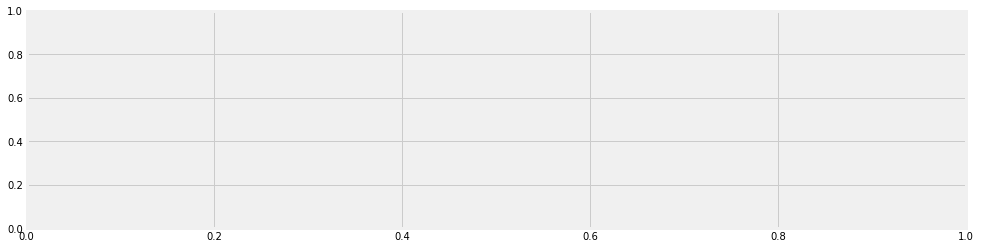

In [ ]:
col = 'avg_frequency_login_days'

plt.figure()
sns.distplot(train_set[col], color='b', label='train', hist=False)
sns.distplot(test_set[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

ValueError: ignored

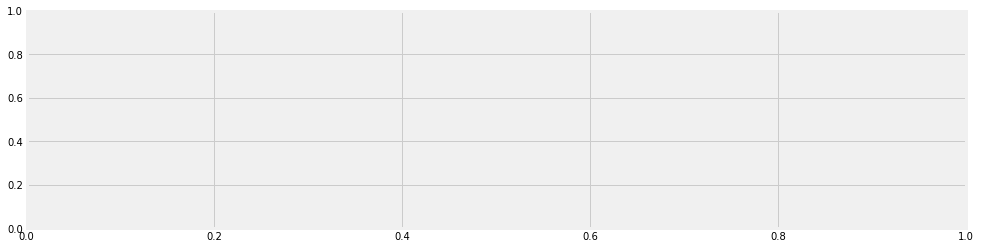

In [ ]:
plt.figure()
sns.distplot(train_set[col][train_set[target] == 1],  label='1',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 2],  label='2',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 3],  label='3',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 4],  label='4',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 5],  label='5',hist=False) # , hist=False

plt.legend(loc='best')
plt.show()

In [ ]:
train_set[col].value_counts(normalize=True)

Error                  0.095425
13.0                   0.037986
8.0                    0.037009
19.0                   0.036814
14.0                   0.036702
                         ...   
-17.157735337395742    0.000028
-8.249657882395262     0.000028
48.2416348084662       0.000028
37.1082375793372       0.000028
37.57986594286163      0.000028
Name: avg_frequency_login_days, Length: 1587, dtype: float64

### **days_since_last_login**

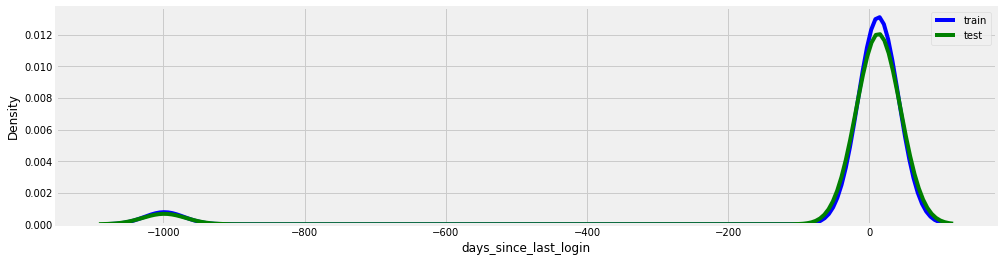

In [ ]:
col ='days_since_last_login'


plt.figure()
sns.distplot(train_set[col], color='b', label='train', hist=False)
sns.distplot(test_set[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

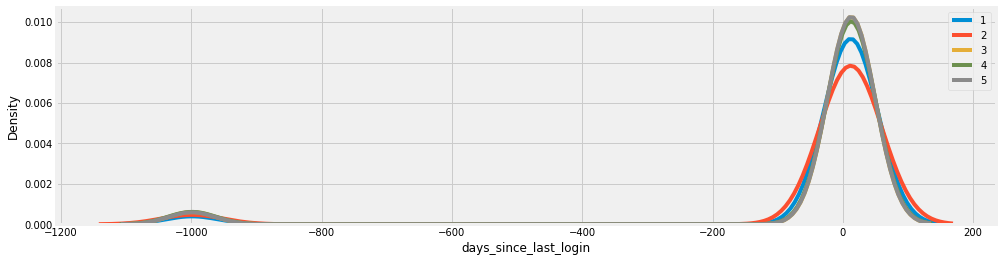

In [ ]:
plt.figure()
sns.distplot(train_set[col][train_set[target] == 1],  label='1',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 2],  label='2',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 3],  label='3',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 4],  label='4',hist=False) # , hist=False
sns.distplot(train_set[col][train_set[target] == 5],  label='5',hist=False) # , hist=False

plt.legend(loc='best')
plt.show()

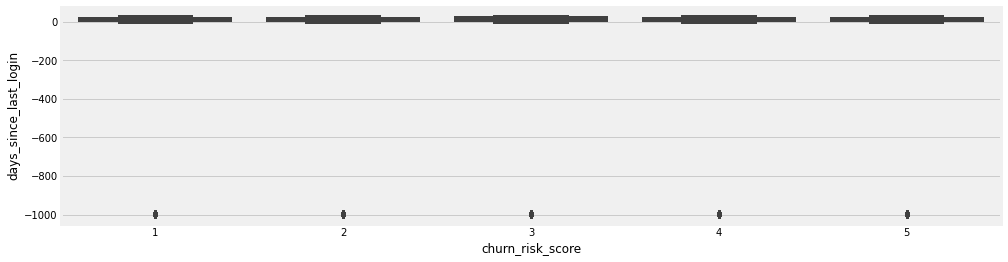

In [ ]:
sns.boxplot(y=col,x=target,data=train_set)

In [ ]:
# Missing values

pd.DataFrame( (train_set.isna().sum() / train_set.shape[0])*100,columns=['missing percentage'] )

,missing percentage
customer_id,0.000000
Name,0.000000
age,0.000000
gender,0.000000
security_no,0.000000
region_category,14.689218
membership_category,0.000000
joining_date,0.000000
joined_through_referral,0.000000
referral_id,0.000000


## **Bi variant anlysis**

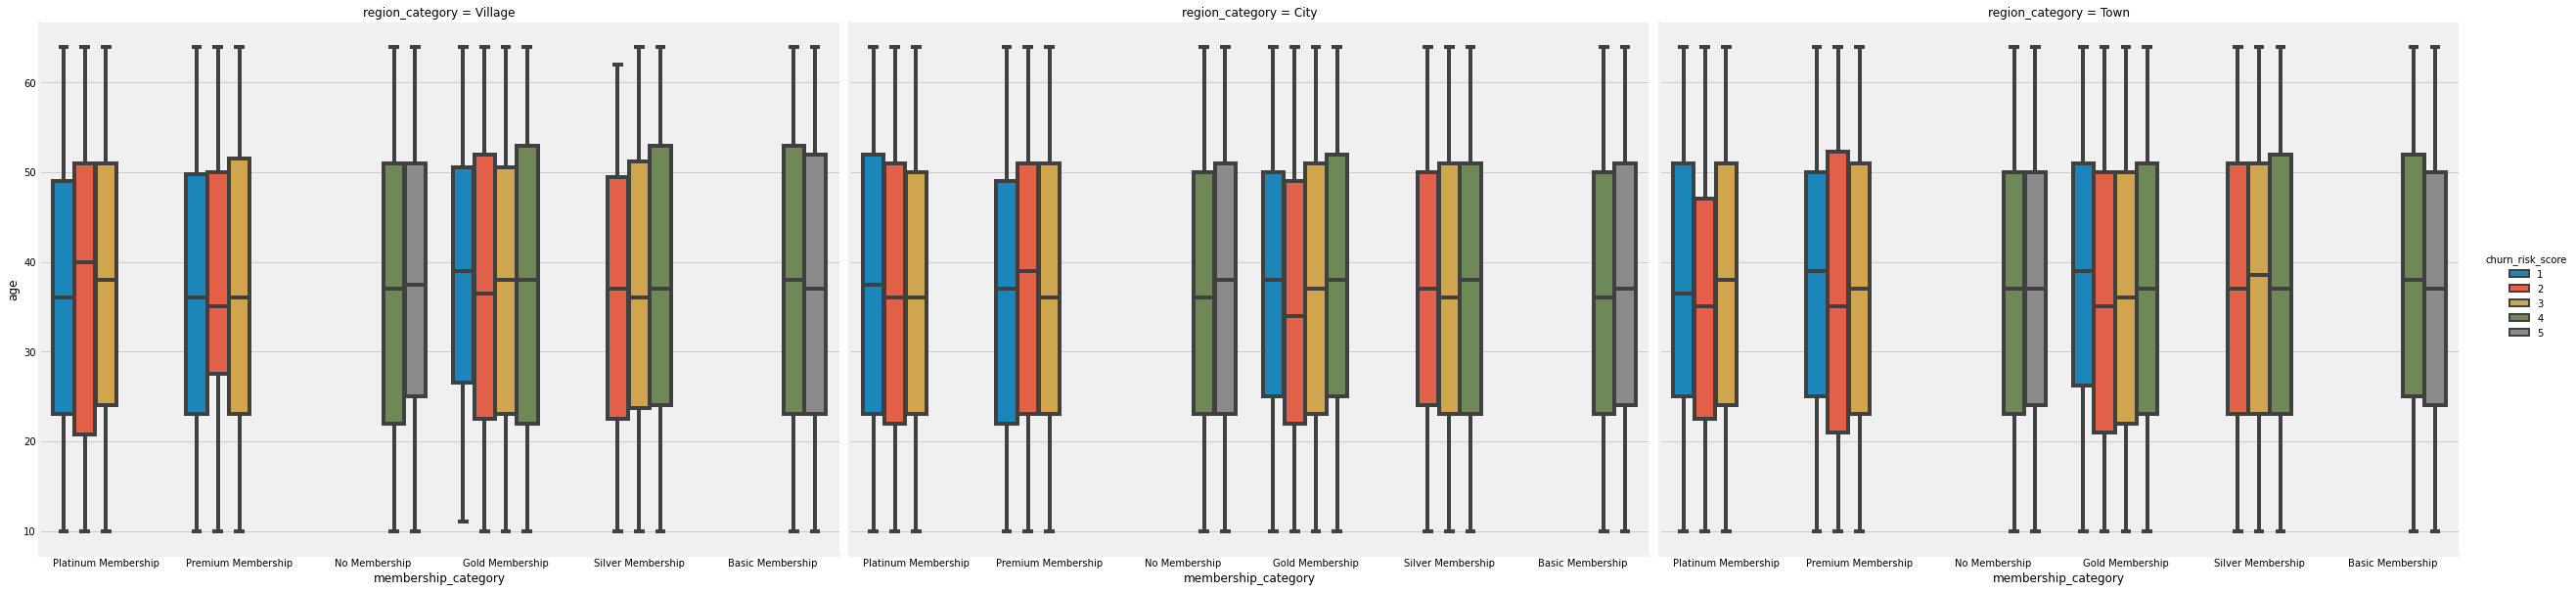

In [ ]:

sns.catplot(x='membership_category',y='age',hue=target,data = train_set[train_set.membership_category.notnull()],col ='region_category',kind='box'
,height=8.27, aspect=11.7/8.27)

In [ ]:
# age bins
data['age_bins'] = pd.qcut(data['age'],5,labels=['21','32','43','54','64'])


In [ ]:

#medium_of_operation
data['medium_of_operation'].replace('?','unknown',inplace=True)

data['preferred_offer_types'].fillna('unknown',inplace=True)
data['region_category'].fillna('unknown',inplace=True)
data['points_in_wallet'].fillna(-99999,inplace =True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55748 entries, 0 to 19918
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   customer_id                   55748 non-null  object  
 1   Name                          55748 non-null  object  
 2   age                           55748 non-null  int64   
 3   gender                        55748 non-null  object  
 4   security_no                   55748 non-null  object  
 5   region_category               55748 non-null  object  
 6   membership_category           55748 non-null  object  
 7   joining_date                  55748 non-null  object  
 8   joined_through_referral       55748 non-null  object  
 9   referral_id                   55748 non-null  object  
 10  preferred_offer_types         55748 non-null  object  
 11  medium_of_operation           55748 non-null  object  
 12  internet_option               55748 non-null  

In [ ]:
drop_col = ['customer_id','Name','security_no','referral_id']
data.drop(columns=drop_col,inplace=True)

In [ ]:
data[:train_set.shape[0]].shape

(35829, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55748 entries, 0 to 19918
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        55748 non-null  int8   
 1   region_category               55748 non-null  int8   
 2   membership_category           55748 non-null  int8   
 3   joined_through_referral       55748 non-null  int8   
 4   preferred_offer_types         55748 non-null  int8   
 5   medium_of_operation           55748 non-null  int8   
 6   internet_option               55748 non-null  int8   
 7   days_since_last_login         55748 non-null  int64  
 8   avg_time_spent                55748 non-null  float64
 9   avg_transaction_value         55748 non-null  float64
 10  points_in_wallet              55748 non-null  float64
 11  used_special_discount         55748 non-null  int8   
 12  offer_application_preference  55748 non-null  int8   
 13  p

In [ ]:
data['joining_date'] = pd.to_datetime(data['joining_date'])
data['Year'] = data.joining_date.dt.year
data['Month'] = data.joining_date.dt.month
data['DayOfMonth'] = data.joining_date.dt.day
data['Weekday'] = data.joining_date.dt.dayofweek
data['DayOfYear'] = data.joining_date.dt.dayofyear



In [ ]:
for col in data.columns:
  if data[col].dtype=='object' :
      data[col] = data[col].astype('category')
      data[col] = data[col].cat.codes

    

In [ ]:
drop_2 = ['age','source','joining_date','last_visit_time','avg_frequency_login_days']

In [ ]:
data.drop(columns = drop_2,inplace=True)

In [ ]:
data['age_bins'] = data['age_bins'].cat.codes

In [ ]:
train = data[:train_set.shape[0]]
y = train_set[target]
test = data[train_set.shape[0]:]

In [ ]:
train.shape,test.shape,y.shape

((35829, 22), (19919, 22), (35829,))

In [ ]:
#train_dummies = pd.get_dummies(train,drop_first=True)
#test_dummies = pd.get_dummies(test,drop_first=True)


In [ ]:
train_dummies.head()

,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,Year,Month,DayOfMonth,Weekday,DayOfYear,gender_M,gender_Unknown,region_category_Town,region_category_Village,region_category_unknown,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,preferred_offer_types_unknown,medium_of_operation_Desktop,medium_of_operation_Smartphone,medium_of_operation_unknown,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,age_bins_32,age_bins_43,age_bins_54,age_bins_64
0,17,300.63,53005.25,781.75,2017,8,17,3,229,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,16,306.34,12838.38,-99999.00,2017,8,28,0,240,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,14,516.16,21027.00,500.69,2016,11,11,4,316,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,11,53.27,25239.56,567.66,2016,10,29,5,303,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,20,113.13,24483.66,663.06,2017,9,12,1,255,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
!pip install catboost --q 

In [ ]:
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)

lgb = LGBMClassifier(n_estimators=3000,random_state=123,device='GPU',)
svc = SVC()
rfc = RandomForestClassifier(random_state=123,n_estimators=2000,max_depth=5)
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
dc = DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import recall_score,classification_report
#X_train,X_test,y_train,y_test = train_test_split(train_dummies,y,test_size=.30,random_state=113
#                                                 )   

X_train,X_test,y_train,y_test = train_test_split(train,y,test_size=.30,random_state=113
                                                 ) 

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=2000, random_state=123)

In [ ]:
# predict train and test
train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)

In [ ]:
print("Train recall score  report {}".format(classification_report(y_train,train_pred)))
print("Test recall score  report {}".format(f1_score(y_test,test_pred,average='macro')))


Train recall score  report               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1855
           2       0.00      0.00      0.00      1932
           3       0.57      0.92      0.70      7265
           4       0.68      0.52      0.59      7150
           5       0.72      0.83      0.77      6878

    accuracy                           0.64     25080
   macro avg       0.39      0.45      0.41     25080
weighted avg       0.56      0.64      0.58     25080

Test recall score  report 0.40550242828065874


In [ ]:
for i in zip(train_dummies.columns,rfc.feature_importances_):
  print(i)

('days_since_last_login', 0.002490809661083647)
('avg_time_spent', 0.005181891812166103)
('avg_transaction_value', 0.08084624781757854)
('points_in_wallet', 0.11875428200918453)
('Year', 0.0013411773607752404)
('Month', 0.0018417716045149026)
('DayOfMonth', 0.0029450101790369078)
('Weekday', 0.0021111762456919206)
('DayOfYear', 0.0034301636243643575)
('gender_M', 0.0007504219817833043)
('gender_Unknown', 0.0004241340262484787)
('region_category_Town', 0.0010788878869821235)
('region_category_Village', 0.0025362437720992687)
('region_category_unknown', 0.0007426819428523086)
('membership_category_Gold Membership', 0.048539135911105695)
('membership_category_No Membership', 0.08222464113666819)
('membership_category_Platinum Membership', 0.07604012388292378)
('membership_category_Premium Membership', 0.07030249202713358)
('membership_category_Silver Membership', 0.05899480098022193)
('joined_through_referral_No', 0.002944102337658293)
('joined_through_referral_Yes', 0.0020560716610070547

In [ ]:
cat_model = CatBoostClassifier(n_estimators=5000, # use large n_estimators deliberately to make use of the early stopping
                       #   reg_lambda=5,
                         # l2_leaf_reg=4.0,
                         eval_metric='TotalF1',
                         random_seed=1994,
                         learning_rate = 0.01,
                         depth = 6,
                               
  #                             boosting_type = 'Ordered',
                         # subsample = 0.8,
                         #rsm = 0.7,
                         #silent=True,
                         #max_ctr_complexity = 5,  # no of categorical cols combined
#                          boosting_type = 'Ordered',
                          od_type = 'IncToDec',  #overfitting params
                          od_wait = 100,
                         bagging_temperature = .7
                              )
# lr=0.05, no od type of vars -- highest
    
cat_model.fit(X_train,y_train.values,eval_set=(X_test, y_test),
        plot=True,early_stopping_rounds=100,use_best_model=True,verbose=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6696875	test: 0.6673495	best: 0.6673495 (0)	total: 63.4ms	remaining: 5m 17s
100:	learn: 0.7572071	test: 0.7477926	best: 0.7477926 (100)	total: 3.74s	remaining: 3m 1s
200:	learn: 0.7750861	test: 0.7701887	best: 0.7719183 (197)	total: 7.3s	remaining: 2m 54s
300:	learn: 0.7731098	test: 0.7722183	best: 0.7730559 (226)	total: 10.8s	remaining: 2m 47s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7730558933
bestIteration = 226

Shrink model to first 227 iterations.


In [ ]:
train_cat = cat_model.predict(X_train)
test_cat = cat_model.predict(X_test)

In [ ]:
test_final = cat_model.predict(test)

In [ ]:
resutl_cat = pd.DataFrame()

In [ ]:
resutl_cat['customer_id'] = test_set['customer_id']
resutl_cat['churn_risk_score'] = test_final


In [ ]:
resutl_cat.to_csv('cat8.csv',index=False)

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective='multi',class_weight ='balanced'
                    ,reg_alpha=6,Is_unbalace=True,learning_rate=0.002, random_state =1996,max_depth=5,num_leaves=64,
                          num_class=5,n_estimators=10000,subsample=.7,feature_fraction=.7)
lgb_model.fit(X_train, y_train,eval_set=(X_test, y_test),early_stopping_rounds=100,verbose=100)


Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.29457
[200]	valid_0's multi_logloss: 1.09023
[300]	valid_0's multi_logloss: 0.936301
[400]	valid_0's multi_logloss: 0.822011
[500]	valid_0's multi_logloss: 0.733021
[600]	valid_0's multi_logloss: 0.662792
[700]	valid_0's multi_logloss: 0.607468
[800]	valid_0's multi_logloss: 0.564195
[900]	valid_0's multi_logloss: 0.529003
[1000]	valid_0's multi_logloss: 0.500487
[1100]	valid_0's multi_logloss: 0.477589
[1200]	valid_0's multi_logloss: 0.458021
[1300]	valid_0's multi_logloss: 0.441944
[1400]	valid_0's multi_logloss: 0.428649
[1500]	valid_0's multi_logloss: 0.417544
[1600]	valid_0's multi_logloss: 0.408281
[1700]	valid_0's multi_logloss: 0.40044
[1800]	valid_0's multi_logloss: 0.393783
[1900]	valid_0's multi_logloss: 0.388415
[2000]	valid_0's multi_logloss: 0.383767
[2100]	valid_0's multi_logloss: 0.379928
[2200]	valid_0's multi_logloss: 0.376659
[2300]	valid_0's multi_logloss: 0.373683
[2400]	

LGBMClassifier(Is_unbalace=True, class_weight='balanced', feature_fraction=0.7,
               learning_rate=0.002, max_depth=5, n_estimators=10000,
               num_class=5, num_leaves=64, objective='multi', random_state=1996,
               reg_alpha=6, subsample=0.7)

In [ ]:
# predict
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)
print(f1_score(y_train, y_train_pred,average='macro'))
print(f1_score(y_test, y_test_pred,average='macro'))


In [ ]:
# predict
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)
print(f1_score(y_train, y_train_pred,average='macro'))
print(f1_score(y_test, y_test_pred,average='macro'))

0.8687895069107535
0.760105242258154


In [ ]:
test_lgb = lgb_model.predict(test)

resutl_lgb = pd.DataFrame()
resutl_lgb['customer_id'] = test_set['customer_id']
resutl_lgb['churn_risk_score'] = test_lgb
resutl_lgb.to_csv('lgbm2.csv')